# Video Game Sales Analysis and Visualizations

### Goal: Analyze important metrics related to the sales, distribution, information and ratings of video games and their subsequent platforms up to late 2016, along with visualizing these metrics for a resulting analysis that showcases trends and KPIs across over 16,000 titles.

## Step 1 - Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv(r"/Users/majorlydata/Downloads/Video_Games_Sales_as_at_22_Dec_2016.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2 - Exploratory Data Analysis

Use head() to view the first few rows of the dataset.

In [18]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Show row and column information within the dataset.

In [20]:
# Use shape to extract the number of rows and columns from the data
shape = df.shape
print('Rows, Columns: ', shape)

Rows, Columns:  (16719, 16)


In [60]:
# Double check the number of rows using the length function
print('Rows: ', len(df.index))

Rows:  16719


In [61]:
# Double check the number of columns using the length function
print('Columns: ', len(df.columns))

Columns:  16


### Display names of all the columns.

In [64]:
# Loop through each column and show its name
for column in df.columns:
    print(column)

Name
Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count
Developer
Rating


### Generate a statistical summary of the data.

In [68]:
# Use the describe() function to show a stat summary of each column
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


The above summary showcases meaningful information around the data, such as minimum and maximum values, mean and different percentile marks. From this, we can extract a lot of interesting data points, such as the maximum amount of sales in each region or the average critic and user scores across all titles.

### Check for null values and identify data type of each column.

In [69]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

We can see that there are a decent amount of missing values in the score and count sections. This is probably because the games weren't rated on IMDB. Missing developer info or other values such as year of release and publisher can most likely be attributed to either unknown or inconclusive data.

In [71]:
# Use the info() function to list information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Step 3 - Unique Values in Columns

### Display count figure of important categories.

In [23]:
# View column names
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [16]:
# Use the value_counts() function to show the count of values for each category
df['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [14]:
df['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [15]:
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

In [22]:
# Show unique values of each column
for column in df:
    print('Unique ' + column + ' Values:')
    print(len(df[column].unique().tolist()))
    print('\n')

Unique Name Values:
11563


Unique Platform Values:
31


Unique Year_of_Release Values:
40


Unique Genre Values:
13


Unique Publisher Values:
582


Unique NA_Sales Values:
402


Unique EU_Sales Values:
307


Unique JP_Sales Values:
244


Unique Other_Sales Values:
155


Unique Global_Sales Values:
629


Unique Critic_Score Values:
83


Unique Critic_Count Values:
107


Unique User_Score Values:
97


Unique User_Count Values:
889


Unique Developer Values:
1697


Unique Rating Values:
9




## Step 4 - Aggregation of columns within the dataset

Use the groupby() function to group categories of data together to analyze aggregate information.

In [62]:
year_released_group = df.groupby('Year_of_Release')

In [63]:
year_released_group

### Display sales of each region by release year.

In [143]:
yrg = year_released_group.agg({'NA_Sales': np.sum, 
                         'EU_Sales': np.sum, 
                         'JP_Sales': np.sum, 
                         'Other_Sales': np.sum, 
                         'Global_Sales': np.sum})
yrg

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36
1985.0,33.73,4.74,14.56,0.92,53.94
1986.0,12.50,2.84,19.81,1.93,37.07
1987.0,8.46,1.41,11.63,0.20,21.74
1988.0,23.87,6.59,15.76,0.99,47.22


### Show top 10 years of Global Sales.

In [147]:
t10_global = yrg.nlargest(10, 'Global_Sales').reset_index()

In [148]:
t10_global

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2008.0,348.69,181.14,60.25,81.42,671.79
1,2009.0,335.55,187.94,61.89,73.44,658.88
2,2007.0,309.89,157.82,60.29,76.75,605.37
3,2010.0,300.65,171.42,59.49,58.57,590.59
4,2006.0,262.13,127.89,73.74,53.95,518.22
5,2011.0,238.79,162.97,53.07,52.75,507.79
6,2005.0,242.15,121.11,54.27,40.29,458.31
7,2004.0,222.51,107.28,41.65,47.24,419.05
8,2002.0,216.19,109.75,41.76,27.27,395.51
9,2013.0,153.65,121.55,47.69,38.35,361.24


In [150]:
print("Highest Global Sales: " 
      + str(t10_global['Global_Sales'].max()) 
      + "M in " 
      + str(t10_global['Year_of_Release'][0]))

Highest Global Sales: 671.79M in 2008.0


### Group sales by platform and genre.

In [103]:
platform_group = df.groupby('Platform')

In [139]:
pg = platform_group.agg({'NA_Sales': np.sum, 
                    'EU_Sales': np.sum, 
                    'JP_Sales': np.sum, 
                    'Other_Sales': np.sum, 
                    'Global_Sales': np.sum})
pg

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,90.60,5.47,0.00,0.91,97.08
3DO,0.00,0.00,0.10,0.00,0.10
3DS,83.49,61.48,100.67,13.36,259.09
DC,5.43,1.69,8.56,0.27,15.97
DS,382.67,188.89,175.57,59.28,807.10
GB,114.32,47.82,85.12,8.20,255.45
GBA,187.54,75.25,47.33,7.73,318.50
GC,133.46,38.71,21.58,5.18,199.36
GEN,21.05,6.05,2.70,0.97,30.78


In [154]:
t3_platform = pg.nlargest(3, 'Global_Sales').reset_index()

In [155]:
t3_platform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PS2,583.84,339.29,139.20,193.44,1255.64
1,X360,602.47,270.76,12.43,85.76,971.63
2,PS3,393.49,330.29,80.19,135.68,939.43


In [105]:
genre_group = df.groupby('Genre')

In [151]:
gg = genre_group.agg({'NA_Sales': np.sum, 
                 'EU_Sales': np.sum, 
                 'JP_Sales': np.sum, 
                 'Other_Sales': np.sum, 
                 'Global_Sales': np.sum})
gg

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,879.01,519.13,161.44,184.60,1745.27
Adventure,105.26,63.54,52.30,16.49,237.69
Fighting,223.36,100.33,87.48,36.36,447.48
Misc,407.27,212.74,108.11,74.39,803.18
Platform,445.50,200.35,130.83,51.09,828.08
Puzzle,122.87,50.01,57.31,12.38,243.02
Racing,359.35,236.51,56.71,76.10,728.90
Role-Playing,330.81,188.71,355.46,59.63,934.40
Shooter,592.24,317.34,38.76,104.11,1052.94


## Step 5 - Data Visualization

### Visualize various metrics in plots and charts.

Change release year data type to integer to get rid of decimal.

In [152]:
t10_global['Year_of_Release'] = t10_global['Year_of_Release'].astype(int)

Text(0.5, 1.0, 'Top 10 Sales Years')

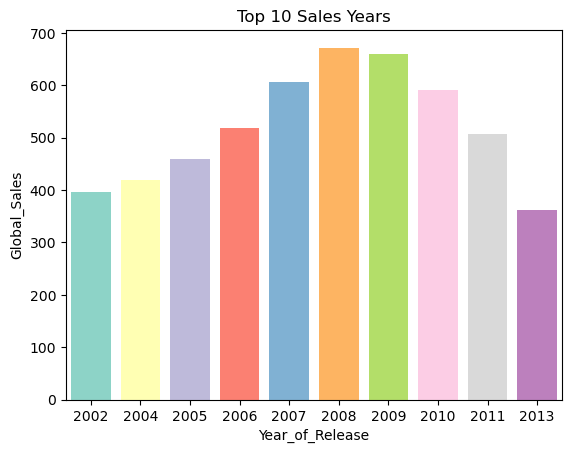

In [153]:
sns.barplot(x = 'Year_of_Release', 
            y = 'Global_Sales', 
            data = t10_global, 
            palette = 'Set3', 
            saturation = 1).set_title('Top 10 Sales Years')

Show count of genres in the dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Platform'),
  Text(2, 0, 'Racing'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Puzzle'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Action'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

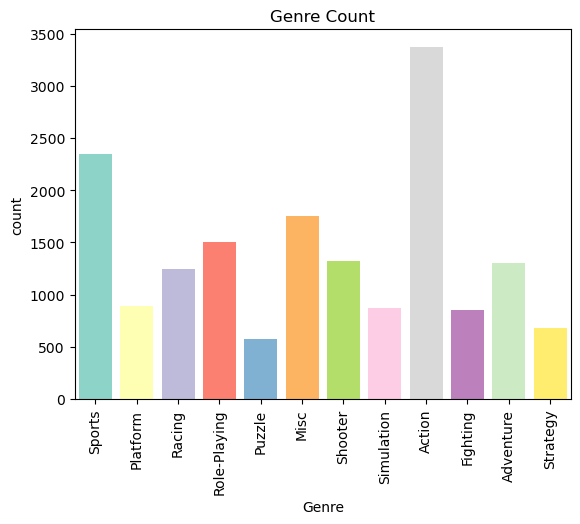

In [128]:
sns.countplot(x = 'Genre', 
              data = df, 
              palette = 'Set3', 
              saturation = 1).set_title('Genre Count')
plt.xticks(rotation = 90)

Display top 3 platforms and sales by region.

In [159]:
# Reconfigure the top 3 platform table to visualize data
t3_platform_melt = t3_platform.melt(id_vars = 'Platform', value_name = 'Sales', var_name = 'Region')

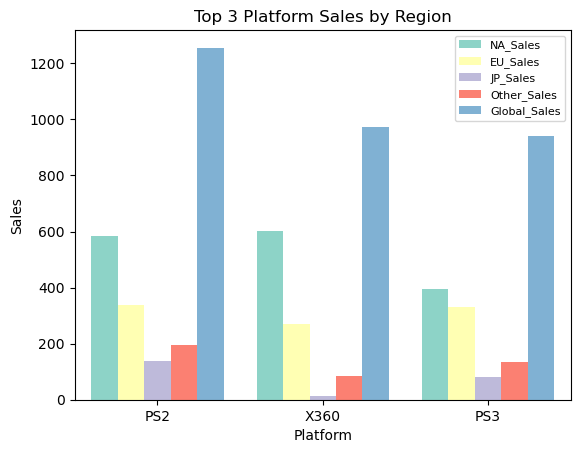

In [169]:
sns.barplot(data = t3_platform_melt, 
            x = 'Platform', 
            y = 'Sales', 
            hue = 'Region', 
            palette = 'Set3', 
            saturation = 1).set_title('Top 3 Platform Sales by Region')
plt.legend(loc = 'best', prop = {'size': 8})

Create a line chart showing global sales over release years.

Text(0.5, 1.0, 'Global Sales Over Release Years')

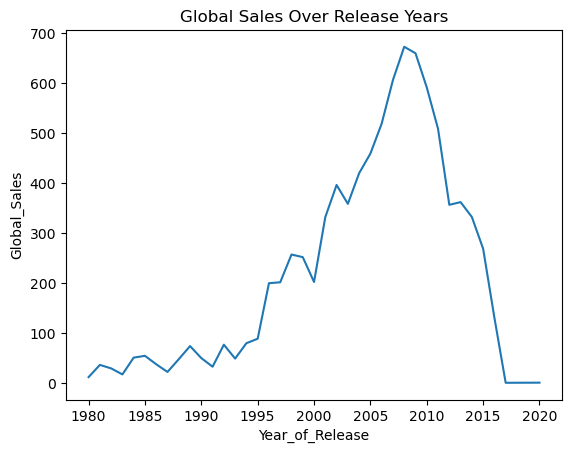

In [171]:
sns.lineplot(x = 'Year_of_Release', 
             y = 'Global_Sales', 
             data = yrg).set_title('Global Sales Over Release Years')

## Conclusion:

From exploring the data to analyzing important metrics to visualizing the dataset, we've pulled valuable information about different KPIs such as sales by region, sales over time and platform info. 2008 was the best year out of the set, and there's a clear increase in video game popularity as time goes on.